## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, rep=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=rep)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [43]:
cards = sample_cards(100, 6, 3)
cards

array([[ 1, 26, 64],
       [49, 67, 82],
       [30, 35, 74],
       [39, 62, 92],
       [ 6, 36, 44],
       [ 9, 61, 71]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([13, 51, 77]), array([12, 82, 97]))

The lowest card in the game is

In [5]:
np.min(cards)

1

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [3]:
N = 100
n = 5
k = 4

In [4]:
# To Do cell

min_list = []
for i in range(100000):
    cards = sample_cards(N, n, k)
    min_cards = np.min(cards)
    min_list.append(min_cards)

(array([2.0044e+04, 1.6149e+04, 1.2911e+04, 1.0475e+04, 8.4090e+03,
        6.8500e+03, 5.4690e+03, 4.2060e+03, 3.3080e+03, 2.7870e+03,
        2.0510e+03, 1.6400e+03, 1.3030e+03, 1.0190e+03, 7.7500e+02,
        6.0200e+02, 4.5400e+02, 3.4500e+02, 3.0500e+02, 2.2000e+02,
        1.5700e+02, 1.3500e+02, 7.6000e+01, 7.5000e+01, 5.6000e+01,
        4.0000e+01, 4.0000e+01, 2.7000e+01, 1.9000e+01, 2.0000e+01,
        7.0000e+00, 9.0000e+00, 5.0000e+00, 5.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41.]),
 <BarContainer object of 40 artists>)

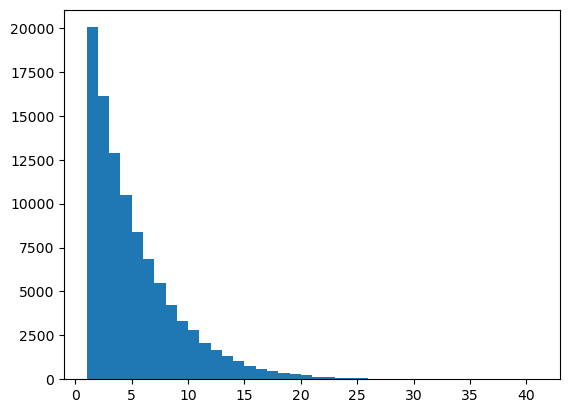

In [5]:
plt.hist(min_list,bins=40)

In [6]:
np.max(np.sort(min_list))

41

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [7]:
def max_gap1(N,n,k,iternum, rep=False,seedstart=0):
    max_gap_list = []
    random.seed(seedstart)
    for i in range(iternum):
        cards = sample_cards(N, n, k, rep=rep)
        cards1 = np.sort(cards.reshape(1,n*k)[0])
        cards2 = cards1[1:len(cards1)]
        cards2 = np.insert(cards2,len(cards2),np.max(cards2))
        gap = cards2-cards1
        max_gap_list.append(np.max(gap))
    return max_gap_list

In [9]:
max_gap_list = max_gap1(N,n,k,100000)

(array([3.0000e+00, 4.0000e+01, 3.5900e+02, 1.4850e+03, 3.8460e+03,
        6.8710e+03, 9.5650e+03, 1.1090e+04, 1.1306e+04, 1.0496e+04,
        9.2370e+03, 7.8290e+03, 6.2030e+03, 5.1430e+03, 3.9710e+03,
        3.1070e+03, 2.4020e+03, 1.7640e+03, 1.3720e+03, 1.0300e+03,
        7.7000e+02, 5.5400e+02, 0.0000e+00, 4.3100e+02, 3.3400e+02,
        2.3200e+02, 1.7000e+02, 8.9000e+01, 7.2000e+01, 8.6000e+01,
        4.2000e+01, 2.5000e+01, 2.3000e+01, 1.4000e+01, 1.3000e+01,
        5.0000e+00, 7.0000e+00, 4.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([ 6.        ,  6.95652174,  7.91304348,  8.86956522,  9.82608696,
        10.7826087 , 11.73913043, 12.69565217, 13.65217391, 14.60869565,
        15.56521739, 16.52173913, 17.47826087, 18.43478261, 19.39130435,
        20.34782609, 21.30434783, 22.26086957, 23.2173913 , 24.17391304,
        25.13043478, 26.08695652, 27.04347826, 28.        , 28.95652174,
 

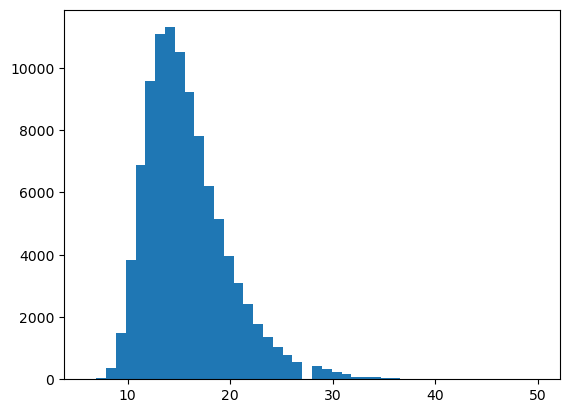

In [16]:
plt.hist(max_gap_list,bins=46)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [17]:
# To Do cell
# define a function to calculate the largest gap list
# same N, n, k
def max_gap2(N,n,k,iternum,rep=False, seedstart=0):
    max_gap_list2 = []
    random.seed(seedstart)
    
    for i in range(iternum):
        cards = sample_cards(N, n, k,rep=rep)
        cards1 = cards.reshape(1,n*k)[0]
        # add person index 
        ind1 = np.array(range(n)).repeat(k)
        cardswithind = np.vstack((cards1,ind1))

        sorted_ind = np.argsort(cardswithind[0,:])
        cardswithind = cardswithind[:, sorted_ind]

        cardswithind1 = cardswithind[:,:-1]
        cardswithind2 = cardswithind[:,1:]

        # calculate the gap
        gap1 = cardswithind2[0,:] - cardswithind1[0,:]
        gap_ind1 = cardswithind2[1,:] - cardswithind1[1,:]
        gapwithind = np.vstack((gap1,gap_ind1))

        not0int = np.where(gapwithind!=0)
        gap = gapwithind[not0int][:int(len(gapwithind[not0int])/2)] # get gap without index

        #print('1:',cardswithind1[0,:])
        #print('2:',cardswithind2[0,:])
        #print(gap)
        
        # get max gap
        max_gap_list2.append(np.max(gap))
    return max_gap_list2

In [18]:
max_gap_list2 = max_gap2(N,n,k,100000)

(array([4.0000e+00, 2.8000e+01, 2.1600e+02, 8.5400e+02, 2.5140e+03,
        5.2110e+03, 8.0210e+03, 1.0077e+04, 1.1114e+04, 1.0855e+04,
        1.0106e+04, 8.5330e+03, 7.0670e+03, 5.8640e+03, 4.5360e+03,
        3.7050e+03, 2.7320e+03, 2.1740e+03, 1.6300e+03, 1.2590e+03,
        9.6800e+02, 7.0900e+02, 5.0900e+02, 3.6200e+02, 2.4500e+02,
        2.1600e+02, 1.3000e+02, 1.1100e+02, 8.6000e+01, 4.8000e+01,
        3.2000e+01, 2.8000e+01, 1.7000e+01, 1.2000e+01, 1.1000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
        18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46.]),
 <BarContainer object of 41 artists>)

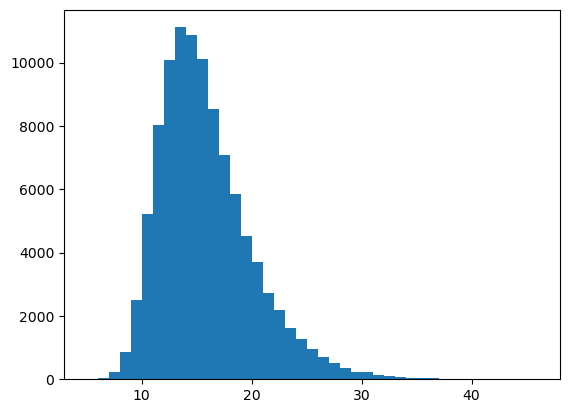

In [26]:
plt.hist(max_gap_list2,bins=41)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

### plot mean of the max gap

In [27]:
# To Do cell
nlist = [3,4,5,6,7]
klist = [3,4,5,6,7]
iternum = 100000
meanlist = [[],[],[],[]]
for n0 in nlist:
    for k0 in klist:
        max_gap_list = max_gap1(N, n0, k0, iternum, seedstart=5)
        max_gap_list2 = max_gap2(N,n0,k0,iternum, seedstart=5)
        meanlist[0].append(n0)
        meanlist[1].append(k0)
        meanlist[2].append(np.mean(max_gap_list))
        meanlist[3].append(np.mean(max_gap_list2))
        

In [28]:
res = pd.DataFrame(meanlist).T 
res.columns = ['n','k','max_gap','max_gap2']
res.head(6)

,n,k,max_gap,max_gap2
0,3.0,3.0,26.51516,25.00508
1,3.0,4.0,22.43110,21.20219
2,3.0,5.0,19.36286,18.35082
3,3.0,6.0,16.99999,16.16135
4,3.0,7.0,15.14331,14.42932
5,4.0,3.0,22.43280,21.57685


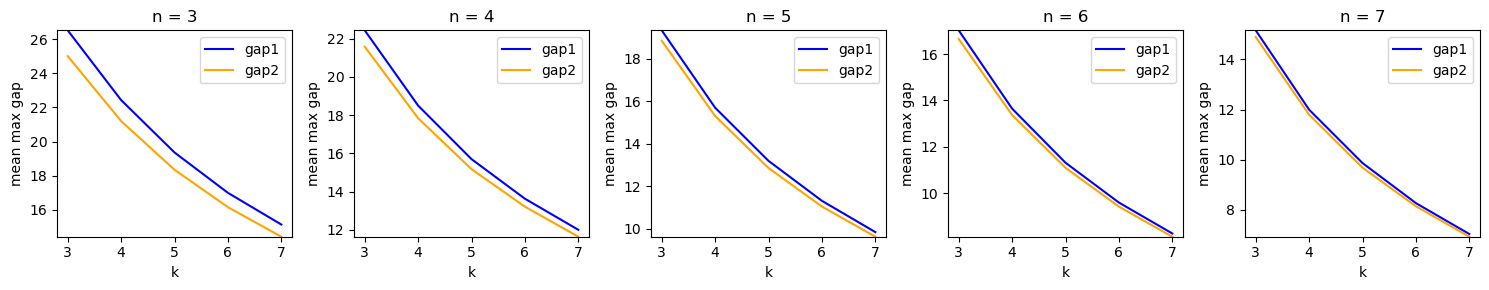

In [36]:
plt.figure(figsize=(15, 3))
for i in range(5): # 0
    plt.subplot(1,5,i+1)
    x = res.iloc[(5*i):(5*i+5),1].to_list()
    y1 = res.iloc[(5*i):(5*i+5),2].to_list()
    y2 = res.iloc[(5*i):(5*i+5),3].to_list()
    plt.plot(x, y1,color='blue',label='gap1')
    plt.plot(x, y2,color='orange',label='gap2')
    plt.title(f'n = {i + 3}')
    plt.axis = 'off'
    plt.xlabel('k')
    plt.ylabel('mean max gap')
    plt.ylim([np.min(y2),np.max(y1)])
    plt.legend()
    
plt.tight_layout()
plt.show()

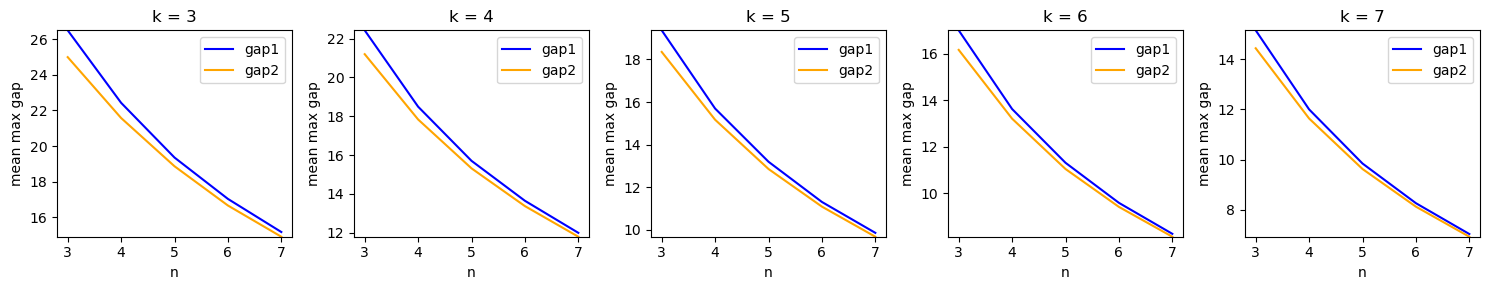

In [35]:
plt.figure(figsize=(15, 3))
for i in range(5): # 0
    plt.subplot(1,5,i+1)
    row_num = np.array([5*i for i in range(5)])+i
    x = res.iloc[row_num,0].to_list()
    y1 = res.iloc[row_num,2].to_list()
    y2 = res.iloc[row_num,3].to_list()
    plt.plot(x, y1,color='blue',label='gap1')
    plt.plot(x, y2,color='orange',label='gap2')
    plt.title(f'k = {i + 3}')
    plt.axis = 'off'
    plt.xlabel('n')
    plt.ylabel('mean max gap')
    plt.ylim([np.min(y2),np.max(y1)])
    plt.legend()

plt.tight_layout()
plt.show()

Denote the max gap among all cards as gap1 and the max gap among different players as gap2.

From the above plot, we can find that when n and k are both small, the difference between mean(gap1) and mean(gap2) is larger. When n and k get large, the difference between these two mean is small and not significant.

For a fixed n, mean(gap1) and mean(gap2) both decrease when k gets large. When n increases, mean(gap1) and mean(gap2) are getting smaller simutenaously for any k, and the difference between these two mean becomes smaller and not significant.

### Another way: plot scatter 

Here we need the same set of samples, so I re-define two functions to calculate the max gap.

In [23]:
# To Do cell
# define a function to calculate the largest gap list
# same N, n, k
def max_gap1_given_cards(cards,N,n,k,iternum):
    cards1 = np.sort(cards.reshape(1,n*k)[0])
    cards2 = cards1[1:len(cards1)]
    cards2 = np.insert(cards2,len(cards2),np.max(cards2))
    gap = cards2-cards1
    return np.max(gap)
def max_gap2_given_cards(cards,N,n,k,iternum):
    cards1 = cards.reshape(1,n*k)[0]
    # add person index 
    ind1 = np.array(range(n)).repeat(k)
    cardswithind = np.vstack((cards1,ind1))

    sorted_ind = np.argsort(cardswithind[0,:])
    cardswithind = cardswithind[:, sorted_ind]

    cardswithind1 = cardswithind[:,:-1]
    cardswithind2 = cardswithind[:,1:]

    # calculate the gap
    gap1 = cardswithind2[0,:] - cardswithind1[0,:]
    gap_ind1 = cardswithind2[1,:] - cardswithind1[1,:]
    gapwithind = np.vstack((gap1,gap_ind1))

    not0int = np.where(gapwithind!=0)
    gap = gapwithind[not0int][:int(len(gapwithind[not0int])/2)] # get gap without index

    return np.max(gap)

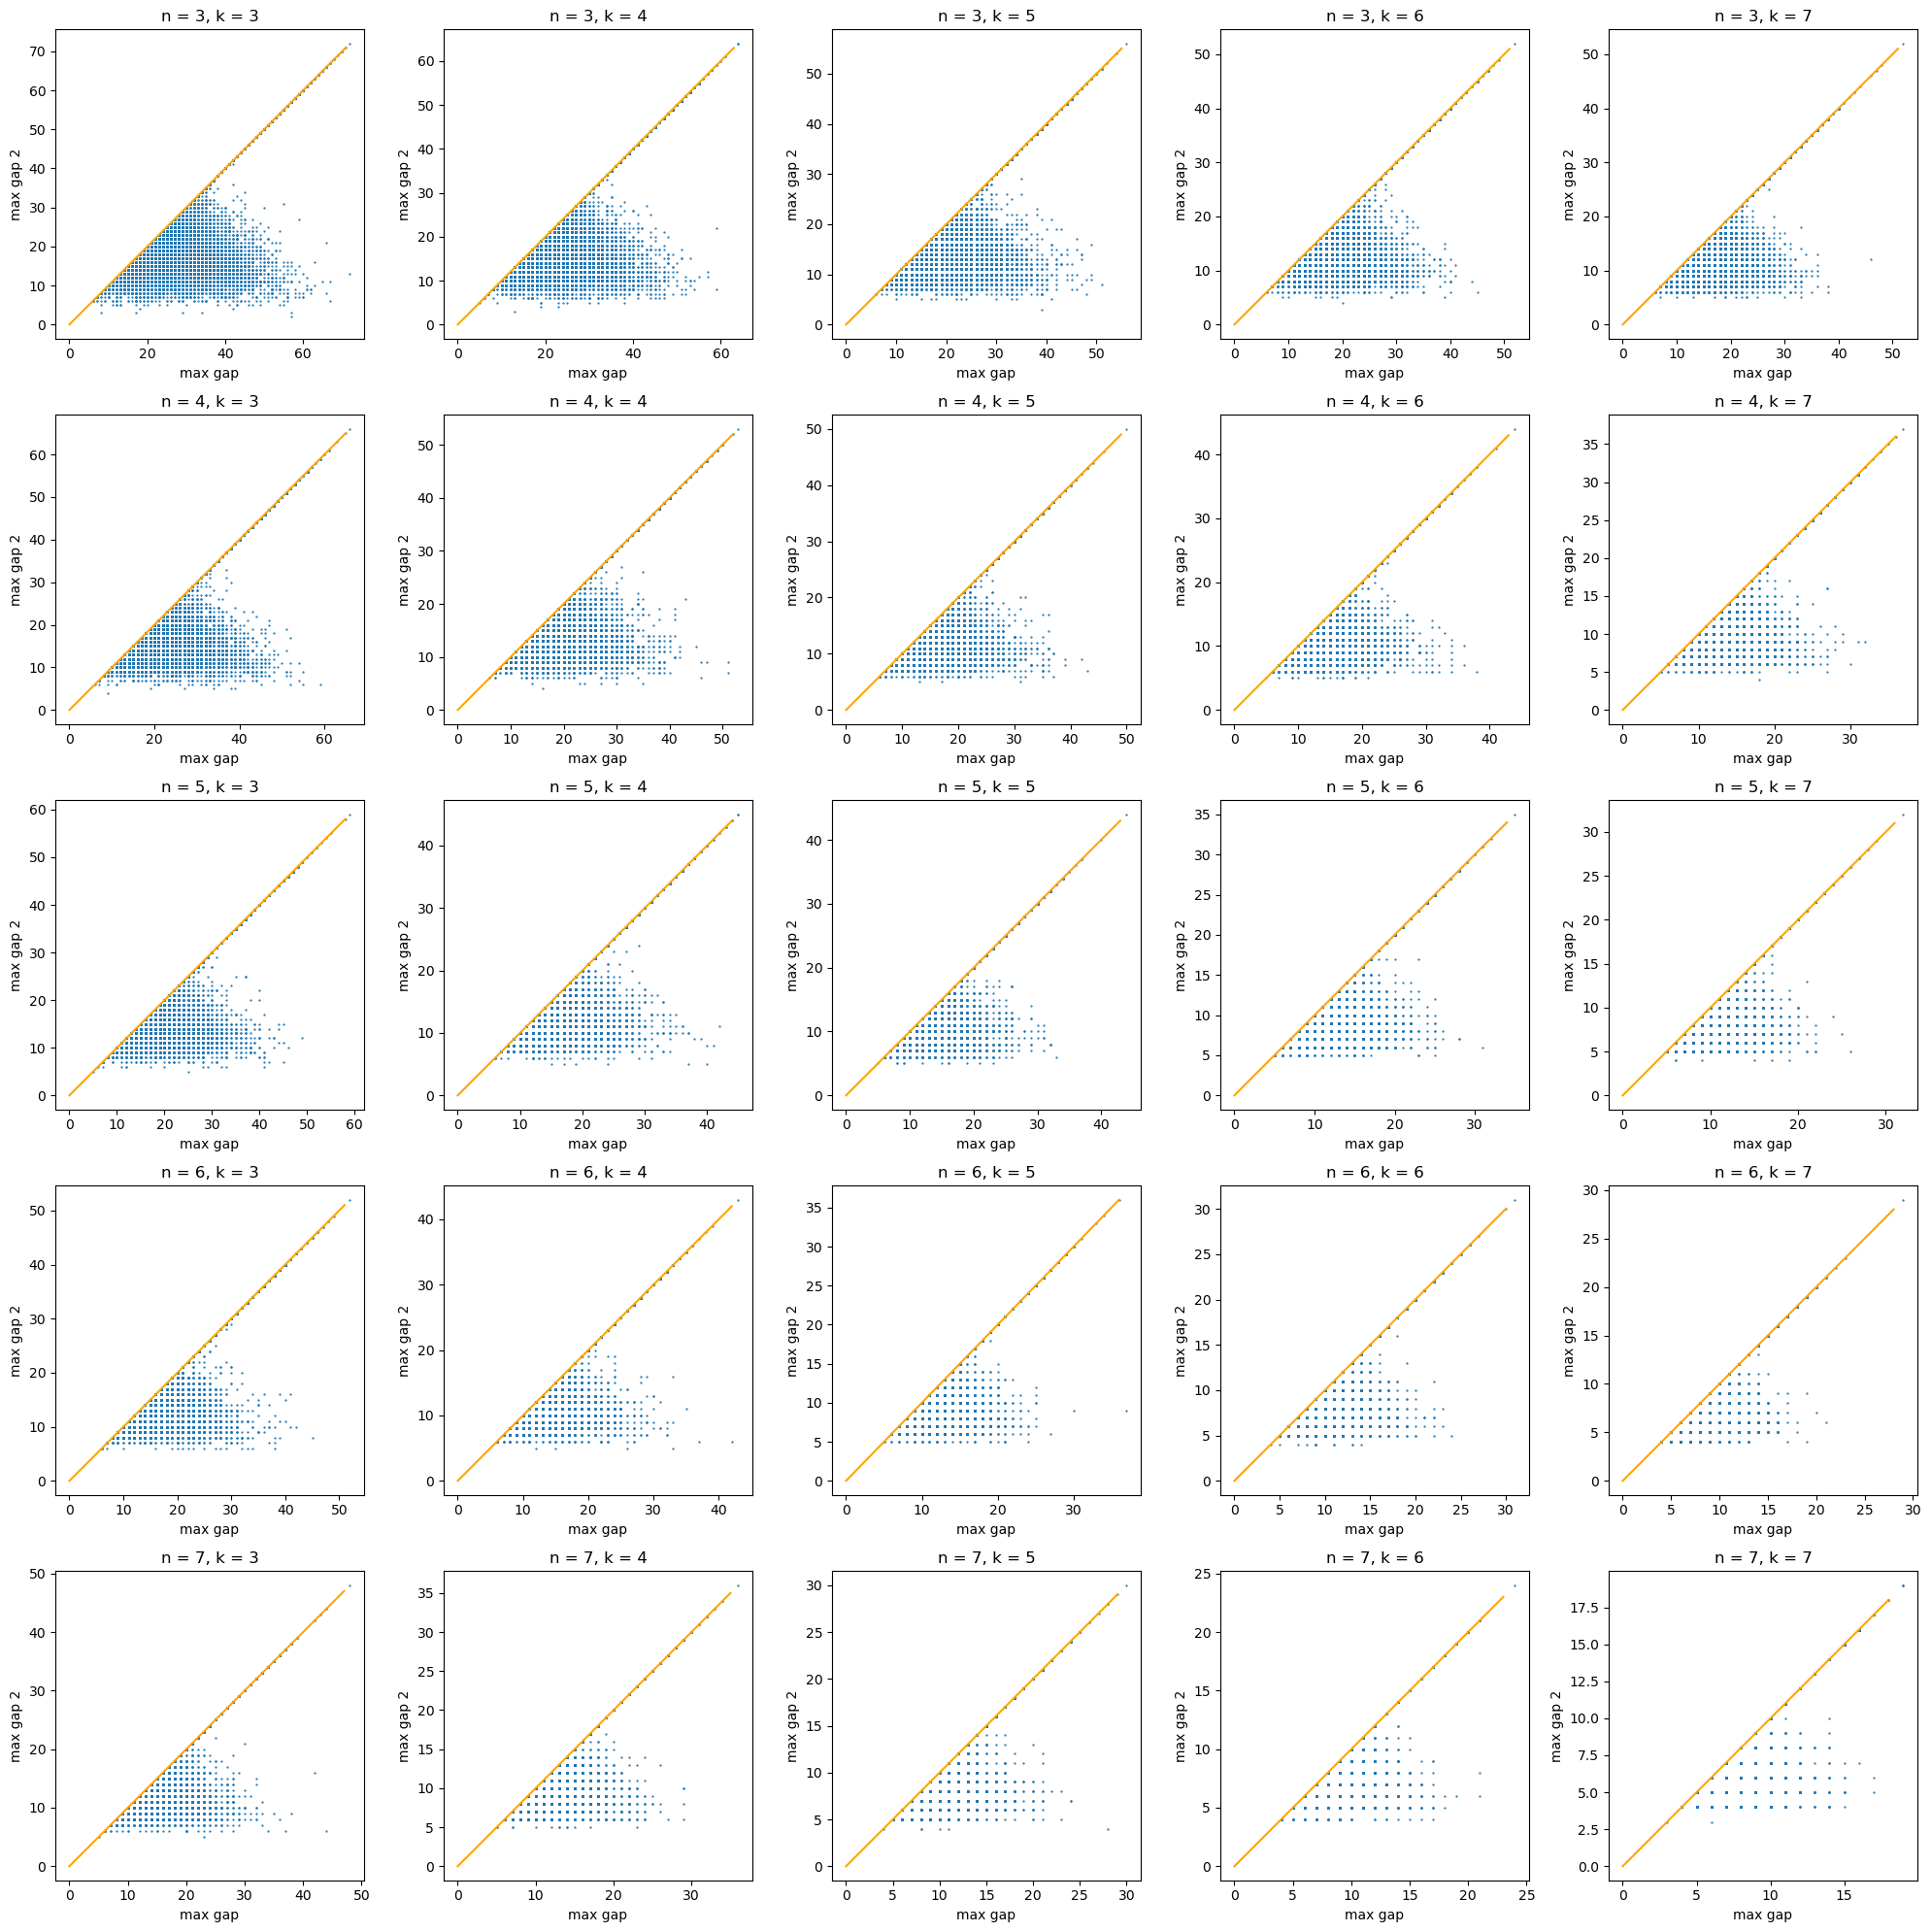

In [31]:
# To Do cell
nlist = [3,4,5,6,7]
klist = [3,4,5,6,7]
iternum = 100000
k = 0
plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 20))
for n0 in nlist:
    for k0 in klist:
        max_gap_list, max_gap_list2 = [],[]
        for i in range(iternum):
            cards = sample_cards(N, n0, k0)
            max_gap_list.append(max_gap1_given_cards(cards,N,n0,k0, iternum))
            max_gap_list2.append(max_gap2_given_cards(cards,N,n0,k0,iternum))

        plt.subplot(5,5,k+1)
        plt.scatter(max_gap_list,max_gap_list2,marker='.',s=1.5)
        plt.plot(range(np.max(max_gap_list)),range(np.max(max_gap_list)),color='orange')
        plt.title(f'n = {n0}, k = {k0}')
        plt.axis = 'off'
        plt.xlabel('max gap')
        plt.ylabel('max gap 2')
        k = k+1
plt.tight_layout()
plt.show()
        

Denote the max gap among all cards as gap1 and the max gap among different players as gap2.

We can easily find that no matter the values of n and k are, gap1 is larger than gap2.

When n and k are both small, both gap1 and gap2 have a wider range of values compares with other occasions.

Also, when n or k decreases, both mean(gap1) and mean(gap2) becomes smaller, for the value corresponding to the scatter point center is getting smaller.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

If the game is with replacement, then the number of cards between 30 to 50. ($30<x\leq50$) is a binomial random variable with $N=n\times k$, p=$\frac{1}{5}$


In [32]:
from scipy.stats import binom
def sample_game(N, n ,k, seedstart=0):
    random.seed(seedstart)
    cards = sample_cards(N, n, k, True)
    cards = cards.reshape(1,cards.size)[0]
    cards_sort = np.sort(cards)
    num_30to50 = [x for x in cards_sort if (x<=50 and x>30)]
    return len(num_30to50)

In [84]:
num_30to50 = []
random.seed(4)
for i in range(100000):
    num_30to50.append(sample_game(N,n,k,True))

Text(0, 0.5, 'probability')

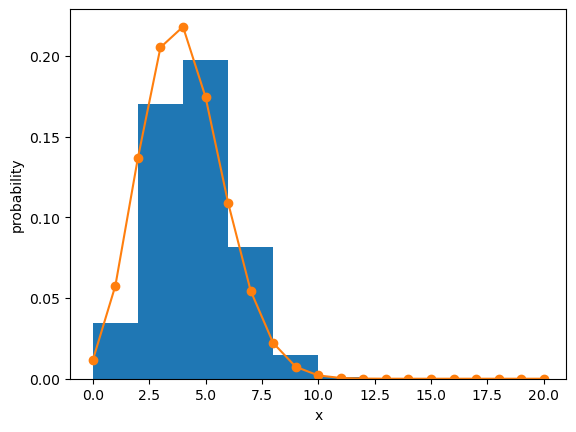

In [83]:
x = range(n*k+1)
plt.hist(num_30to50, bins=7,density=True)
pmf_value = binom.pmf(x, n*k, 1/5)
plt.plot(x, pmf_value, marker='o', linestyle='-')
plt.xlabel("x")
plt.ylabel("probability")

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

In [85]:
# To Do cell
from scipy.stats import beta
min_list = []
random.seed(1)
for i in range(1000000):
    cards = sample_cards(N, n, k)
    min_cards = np.min(cards)
    min_list.append(min_cards)

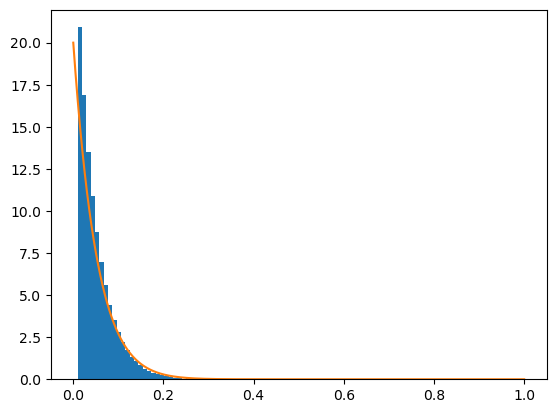

In [104]:
n_beta = n*k # number of cards
k_beta = 1 # 1st order statistics
x = np.linspace(0, 1, 1000)
min_num = np.array(min_list)/100
plt.hist(min_num, bins=50,density=True)
beta_pdfvalue = beta.pdf(x, k_beta, n_beta+1-k_beta)
plt.plot(x, beta_pdfvalue)

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

In [105]:
# To Do cell
from scipy.stats import expon
min_list = []
random.seed(1)
for i in range(1000000):
    cards = sample_cards(N, n, k)
    min_cards = np.min(cards)
    min_list.append(min_cards)

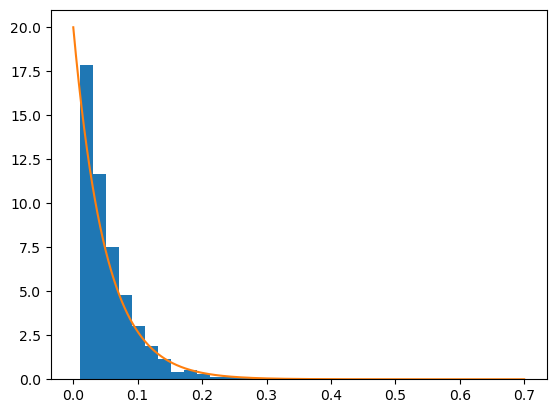

In [122]:
x = -np.log(1-np.array(min_list)/N)
plt.hist(x, bins=30, density=True)
x0 = np.linspace(0, 0.7, 1000)
exp_pdfvalue = expon.pdf(x0, scale=1/(n*k))
plt.plot(x0, exp_pdfvalue)

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

Set N2 = 10000, $20=n * k << N=10000$

In [33]:
# To Do cell
N2 = 10000
n = 4
k = 5

# without replacement

(array([1.50727e+05, 1.28621e+05, 1.09517e+05, 9.41660e+04, 7.88820e+04,
        6.84600e+04, 5.80440e+04, 4.95150e+04, 4.14870e+04, 3.58540e+04,
        3.01900e+04, 2.54690e+04, 2.10010e+04, 1.79030e+04, 1.52890e+04,
        1.26850e+04, 1.07100e+04, 8.69600e+03, 7.44400e+03, 6.21700e+03,
        5.23700e+03, 4.17700e+03, 3.41100e+03, 2.98400e+03, 2.48300e+03,
        2.01600e+03, 1.54300e+03, 1.32500e+03, 1.07600e+03, 9.29000e+02,
        7.82000e+02, 5.83000e+02, 5.44000e+02, 4.19000e+02, 3.42000e+02,
        2.33000e+02, 2.26000e+02, 1.66000e+02, 1.37000e+02, 9.60000e+01,
        1.11000e+02, 6.00000e+01, 4.70000e+01, 4.10000e+01, 3.60000e+01,
        3.40000e+01, 2.60000e+01, 1.10000e+01, 7.00000e+00, 9.00000e+00,
        1.00000e+01, 3.00000e+00, 5.00000e+00, 5.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.00000000e+00, 8.17666667e+01, 1.62533333e+02, 2.43300000e+02,
        3.24066667e+02, 4.04833333e+02, 4.85600000

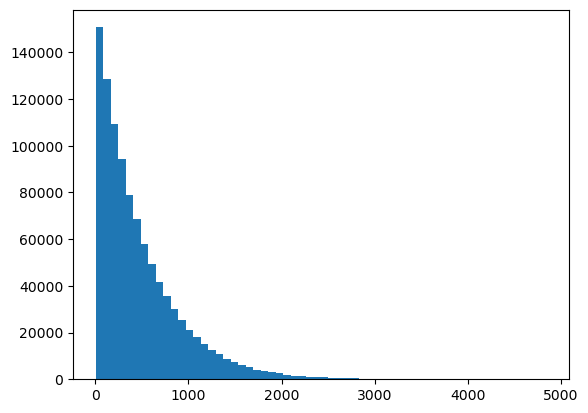

In [39]:
# distribution of the lowest number
min_list = []
for i in range(1000000):
    cards = sample_cards(N2, n, k)
    min_cards = np.min(cards)
    min_list.append(min_cards)
plt.hist(min_list,bins=60)

(array([6.000e+00, 3.800e+01, 2.120e+02, 7.100e+02, 1.728e+03, 3.404e+03,
        5.369e+03, 6.864e+03, 8.279e+03, 8.796e+03, 8.792e+03, 8.332e+03,
        7.752e+03, 6.825e+03, 5.681e+03, 5.033e+03, 4.117e+03, 3.541e+03,
        2.872e+03, 2.280e+03, 1.926e+03, 1.487e+03, 1.230e+03, 1.002e+03,
        8.030e+02, 6.410e+02, 4.890e+02, 3.980e+02, 2.880e+02, 2.590e+02,
        1.960e+02, 1.280e+02, 1.340e+02, 9.500e+01, 6.900e+01, 4.300e+01,
        5.600e+01, 3.100e+01, 2.300e+01, 2.100e+01, 1.100e+01, 6.000e+00,
        9.000e+00, 1.000e+01, 8.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 600.        ,  686.23333333,  772.46666667,  858.7       ,
         944.93333333, 1031.16666667, 1117.4       , 1203.63333333,
        1289.86666667, 1376.1       , 1462.33333333, 1548.56666667,
        1634.8       , 1721.03333333, 1807.26666667, 1

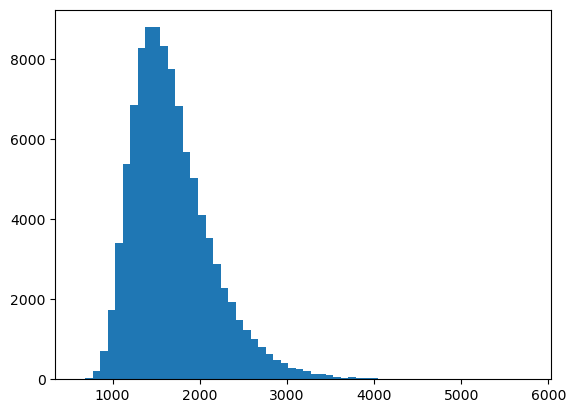

In [35]:
# distribution of the largest gap
max_gap_list = max_gap1(N2,n,k,100000)
plt.hist(max_gap_list,bins=60)

(array([3.000e+00, 1.500e+01, 4.700e+01, 1.450e+02, 3.960e+02, 8.480e+02,
        1.647e+03, 2.595e+03, 3.966e+03, 5.154e+03, 6.087e+03, 6.734e+03,
        7.195e+03, 7.236e+03, 7.037e+03, 6.413e+03, 6.042e+03, 5.489e+03,
        4.868e+03, 4.381e+03, 3.691e+03, 3.216e+03, 2.732e+03, 2.396e+03,
        1.891e+03, 1.641e+03, 1.391e+03, 1.178e+03, 1.010e+03, 8.200e+02,
        7.040e+02, 5.280e+02, 4.590e+02, 3.290e+02, 3.300e+02, 2.590e+02,
        1.870e+02, 1.750e+02, 1.340e+02, 1.190e+02, 1.030e+02, 9.100e+01,
        6.300e+01, 4.800e+01, 4.500e+01, 4.000e+01, 2.600e+01, 2.500e+01,
        1.600e+01, 1.000e+01, 6.000e+00, 1.100e+01, 7.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 452.        ,  524.47142857,  596.94285714,  669.41428571,
         741.88571429,  814.35714286,  886.82857143,  959.3     

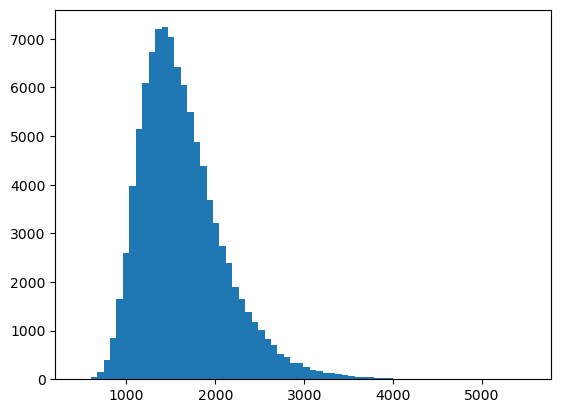

In [36]:
# distribution of the largest gap between different person
max_gap_list2 = max_gap2(N2,n,k,100000)
plt.hist(max_gap_list2,bins=70)

(This plot of binomial distribution is under the assumption that the game has replays. Here we do not need to think about it.)

Beta distribution:

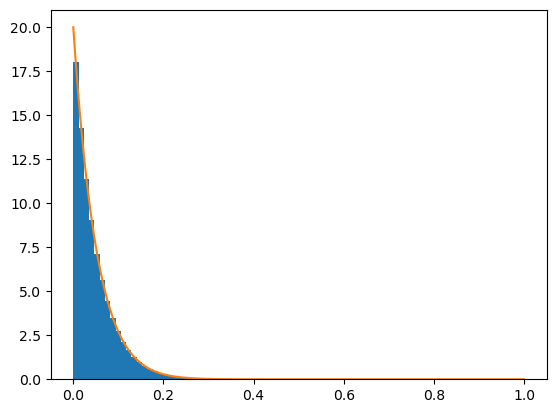

In [43]:
# To Do cell
from scipy.stats import beta
min_list = []
random.seed(1)
for i in range(1000000):
    cards = sample_cards(N2, n, k)
    min_cards = np.min(cards)
    min_list.append(min_cards)
n_beta = n*k # number of cards
k_beta = 1 # 1st order statistics
x = np.linspace(0, 1, 1000)
min_num = np.array(min_list)/N2
plt.hist(min_num, bins=50,density=True)
beta_pdfvalue = beta.pdf(x, k_beta, n_beta+1-k_beta)
plt.plot(x, beta_pdfvalue)

Exponential distribution:

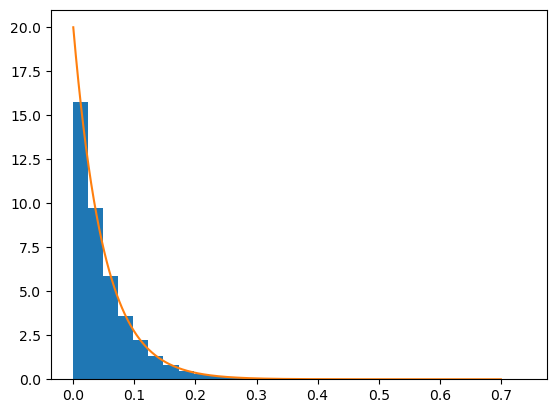

In [42]:
# To Do cell
from scipy.stats import expon
min_list = []
random.seed(1)
for i in range(1000000):
    cards = sample_cards(N2, n, k)
    min_cards = np.min(cards)
    min_list.append(min_cards)
x = -np.log(1-np.array(min_list)/N2)
plt.hist(x, bins=30, density=True)
x0 = np.linspace(0, 0.7, 1000)
exp_pdfvalue = expon.pdf(x0, scale=1/(n*k))
plt.plot(x0, exp_pdfvalue)

# With replacement

(array([1.54902e+05, 1.32340e+05, 1.10877e+05, 9.58720e+04, 8.00710e+04,
        6.83490e+04, 5.76560e+04, 4.91780e+04, 4.09310e+04, 3.52390e+04,
        2.91230e+04, 2.45570e+04, 2.04040e+04, 1.69750e+04, 1.43290e+04,
        1.21000e+04, 9.99900e+03, 8.33900e+03, 7.00200e+03, 5.69900e+03,
        4.73200e+03, 3.97100e+03, 3.18400e+03, 2.77600e+03, 2.14600e+03,
        1.78200e+03, 1.42900e+03, 1.15000e+03, 9.69000e+02, 7.78000e+02,
        6.34000e+02, 5.04000e+02, 4.31000e+02, 3.34000e+02, 2.54000e+02,
        2.08000e+02, 1.84000e+02, 1.34000e+02, 1.00000e+02, 7.00000e+01,
        5.90000e+01, 4.60000e+01, 4.20000e+01, 3.40000e+01, 2.10000e+01,
        1.50000e+01, 1.50000e+01, 1.10000e+01, 1.40000e+01, 1.00000e+01,
        6.00000e+00, 3.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 8.45166667e+01, 1.68033333e+02, 2.51550000e+02,
        3.35066667e+02, 4.18583333e+02, 5.02100000

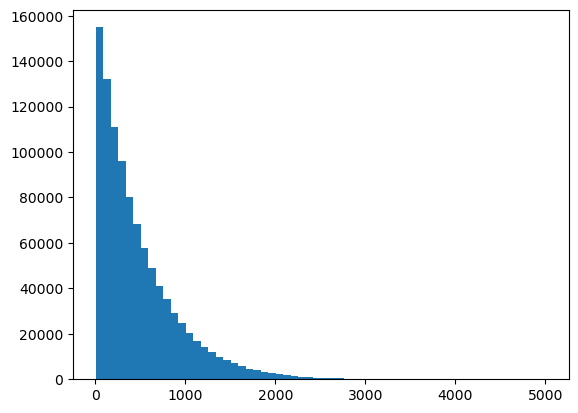

In [44]:
# distribution of the lowest number
min_list = []
for i in range(1000000):
    cards = sample_cards(N2, n, k, rep=True)
    min_cards = np.min(cards)
    min_list.append(min_cards)
plt.hist(min_list,bins=60)

(array([8.000e+00, 5.800e+01, 3.010e+02, 1.024e+03, 2.460e+03, 4.308e+03,
        6.261e+03, 7.776e+03, 9.050e+03, 9.151e+03, 8.660e+03, 8.223e+03,
        7.327e+03, 6.345e+03, 5.479e+03, 4.481e+03, 3.681e+03, 3.072e+03,
        2.509e+03, 1.931e+03, 1.616e+03, 1.303e+03, 1.086e+03, 8.430e+02,
        6.890e+02, 5.170e+02, 4.070e+02, 3.170e+02, 2.440e+02, 2.260e+02,
        1.410e+02, 1.220e+02, 8.600e+01, 7.300e+01, 4.800e+01, 5.400e+01,
        4.000e+01, 2.000e+01, 1.800e+01, 1.100e+01, 1.300e+01, 5.000e+00,
        3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 621.        ,  710.03333333,  799.06666667,  888.1       ,
         977.13333333, 1066.16666667, 1155.2       , 1244.23333333,
        1333.26666667, 1422.3       , 1511.33333333, 1600.36666667,
        1689.4       , 1778.43333333, 1867.46666667, 1

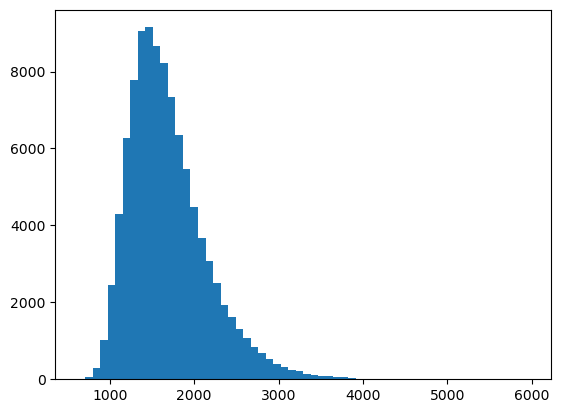

In [45]:
# distribution of the largest gap
max_gap_list = max_gap1(N2,n,k,100000,rep=True)
plt.hist(max_gap_list,bins=60)

(array([4.000e+00, 9.000e+00, 2.400e+01, 6.700e+01, 1.670e+02, 4.190e+02,
        8.240e+02, 1.358e+03, 2.081e+03, 3.044e+03, 3.992e+03, 4.941e+03,
        5.678e+03, 5.944e+03, 6.327e+03, 6.302e+03, 6.280e+03, 5.851e+03,
        5.404e+03, 4.958e+03, 4.620e+03, 4.119e+03, 3.701e+03, 3.235e+03,
        2.817e+03, 2.531e+03, 2.191e+03, 1.931e+03, 1.692e+03, 1.417e+03,
        1.244e+03, 1.072e+03, 8.590e+02, 7.210e+02, 6.550e+02, 6.130e+02,
        4.560e+02, 3.910e+02, 3.420e+02, 2.640e+02, 2.550e+02, 2.120e+02,
        1.710e+02, 1.350e+02, 1.190e+02, 9.100e+01, 8.800e+01, 6.700e+01,
        6.000e+01, 4.000e+01, 3.800e+01, 3.100e+01, 2.600e+01, 2.900e+01,
        1.700e+01, 5.000e+00, 1.500e+01, 1.400e+01, 9.000e+00, 4.000e+00,
        1.300e+01, 3.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 446.        ,  509.18571429,  572.37142857,  635.55714286,
         698.74285714,  761.92857143,  825.11428571,  888.3     

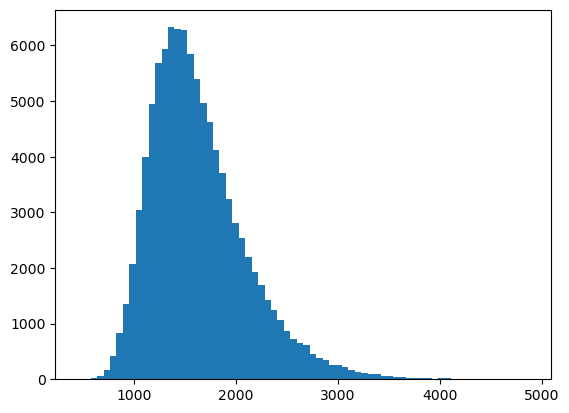

In [46]:
# distribution of the largest gap between different person
max_gap_list2 = max_gap2(N2,n,k,100000,rep=True)
plt.hist(max_gap_list2,bins=70)

Binomial:

Text(0, 0.5, 'probability')

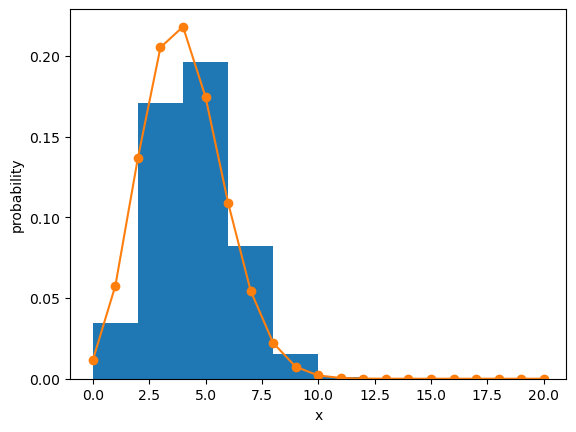

In [47]:
from scipy.stats import binom
def sample_game2(N, n ,k, seedstart=0,rep=False):
    random.seed(seedstart)
    cards = sample_cards(N, n, k, rep=rep)
    cards = cards.reshape(1,cards.size)[0]
    cards_sort = np.sort(cards)
    num_0to2000 = [x for x in cards_sort if (x<=2000 and x>0)]
    return len(num_0to2000)
num_0to2000 = []
random.seed(4)
for i in range(100000):
    num_0to2000.append(sample_game2(N2,n,k,rep=True))
x = range(n*k+1)
plt.hist(num_0to2000, bins=7,density=True)
pmf_value = binom.pmf(x, n*k, 1/5)
plt.plot(x, pmf_value, marker='o', linestyle='-')
plt.xlabel("x")
plt.ylabel("probability")

Beta:

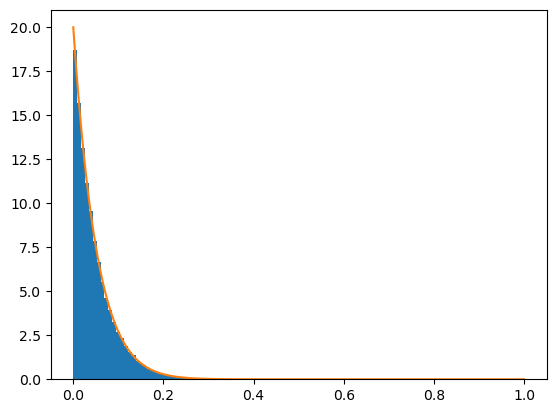

In [48]:
# To Do cell
from scipy.stats import beta
min_list = []
random.seed(1)
for i in range(100000):
    cards = sample_cards(N2, n, k,rep=True)
    min_cards = np.min(cards)
    min_list.append(min_cards)
n_beta = n*k # number of cards
k_beta = 1 # 1st order statistics
x = np.linspace(0, 1, 1000)
min_num = np.array(min_list)/N2
plt.hist(min_num, bins=50,density=True)
beta_pdfvalue = beta.pdf(x, k_beta, n_beta+1-k_beta)
plt.plot(x, beta_pdfvalue)

Exponential:

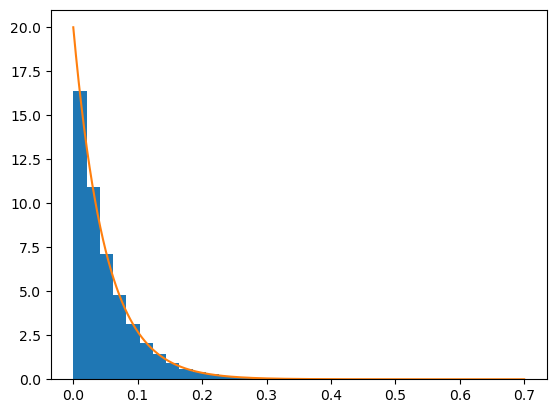

In [49]:
# To Do cell
from scipy.stats import expon
min_list = []
random.seed(1)
for i in range(100000):
    cards = sample_cards(N2, n, k,rep=True)
    min_cards = np.min(cards)
    min_list.append(min_cards)
x = -np.log(1-np.array(min_list)/N2)
plt.hist(x, bins=30, density=True)
x0 = np.linspace(0, 0.7, 1000)
exp_pdfvalue = expon.pdf(x0, scale=1/(n*k))
plt.plot(x0, exp_pdfvalue)

When $n * k << N$, neither with or without reposition shows a significant difference with the occasion when there is no obvious difference between $n*k$ and N.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Yiqiao Huang(Name), yiqiao-huang(github username)
- Member No2: 
- Member No3: